In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("full_gas.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(float)

In [4]:
data = np.genfromtxt("full_gas_out.csv",delimiter=',', dtype=str)
campHeader = (data[0,:]).tolist()
campsol = (data[1:,:]).astype(float)

In [6]:
print(campsol[0,campHeader.index(' CONC.H2O')])
print(campsol[0,campHeader.index(' ENV.number_density_air')])

0.1278614863035299
40.87399840230441


In [7]:
campNames={'Temperature[K]':' ENV.temperature',
           'Pressure[Pascal]':' ENV.pressure',
           't':'time'}

for i,var in enumerate(Header[6:]):
    if var !="M":
        campNames.update({var:' CONC.'+var})
    else:
        campNames.update({var:' ENV.number_density_air'})

In [8]:
print('Checking initial conditions; only print where there are differences')
for i,var in enumerate(campNames):
    camp_idx=campHeader.index(campNames[var])
    tchem_idx=Header.index(var)
    diff= campsol[0,camp_idx] - solTchem[0,tchem_idx]
    if abs(diff) > 0:
        print(var, 'camp :',campsol[0,camp_idx],'TChem :', solTchem[0,tchem_idx])

Checking initial conditions; only print where there are differences
H2O camp : 0.1278614863035299 TChem : 0.1278614863
M camp : 40.87399840230441 TChem : 40.873998402


/var/folders/np/m42416h166j90krvxmfl40940000gp/T/ipykernel_96325/4034699907.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


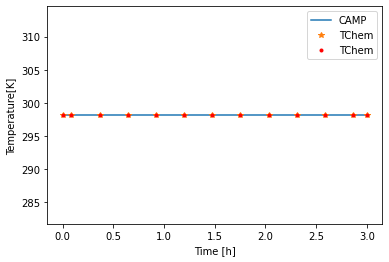

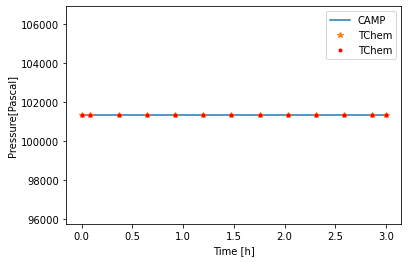

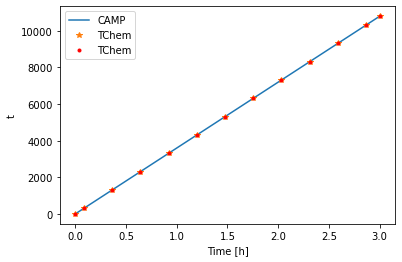

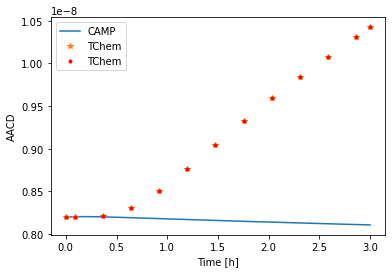

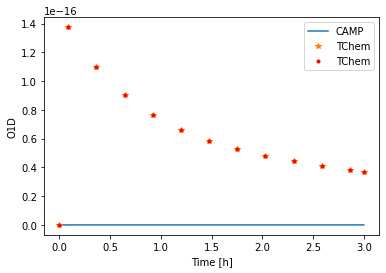

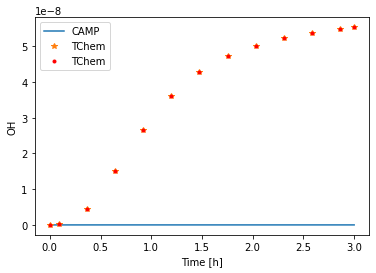

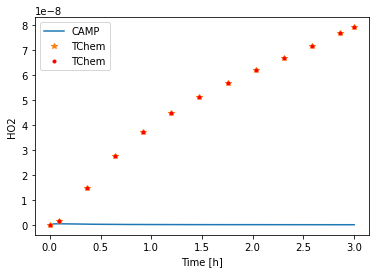

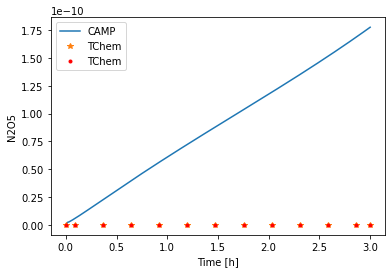

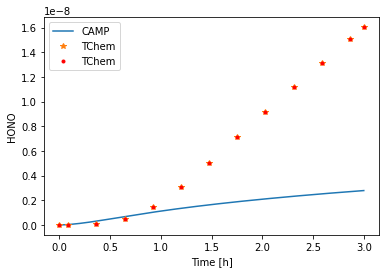

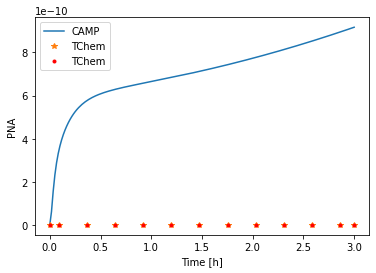

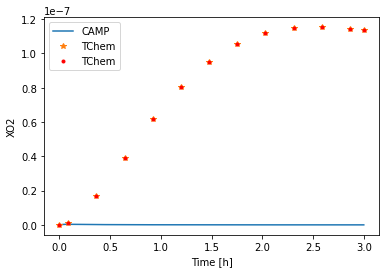

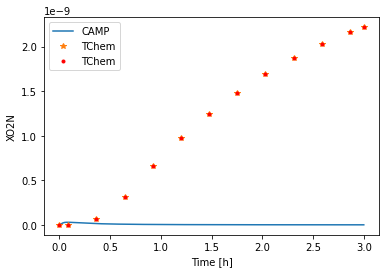

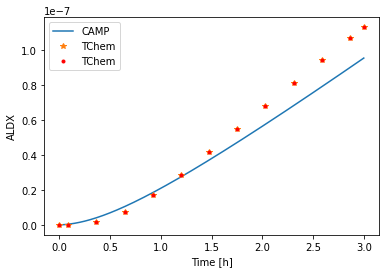

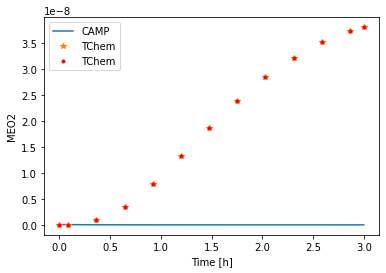

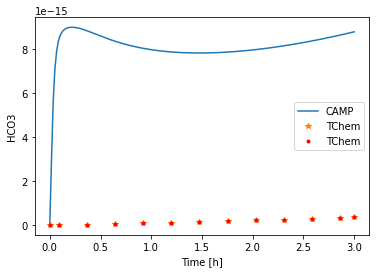

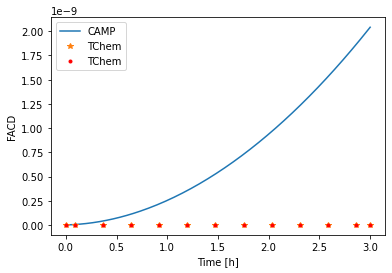

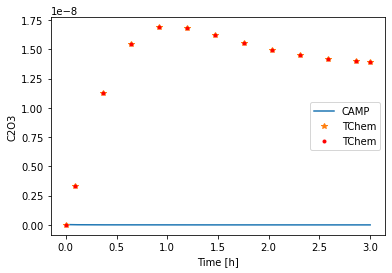

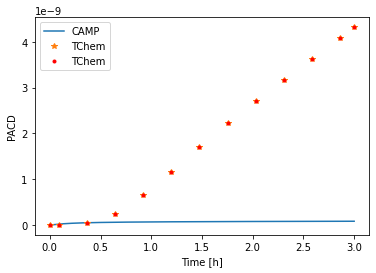

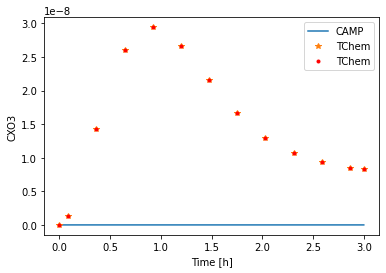

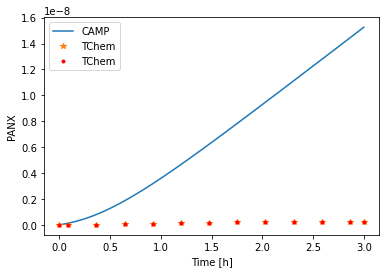

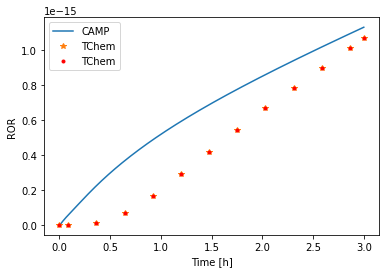

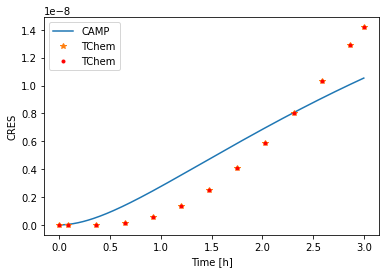

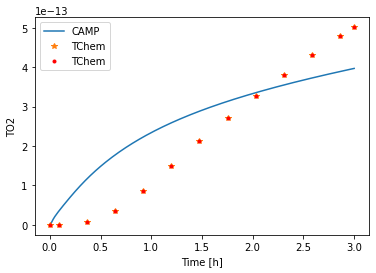

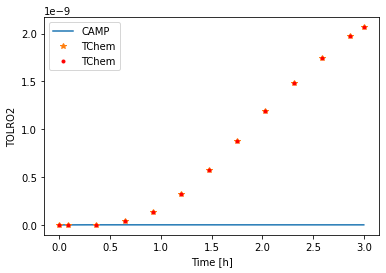

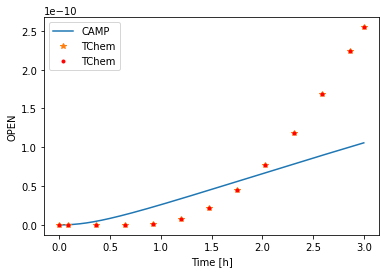

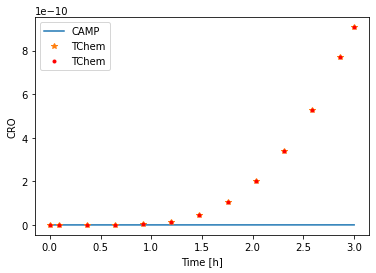

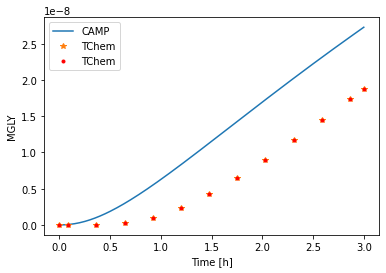

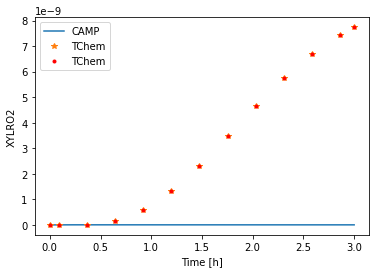

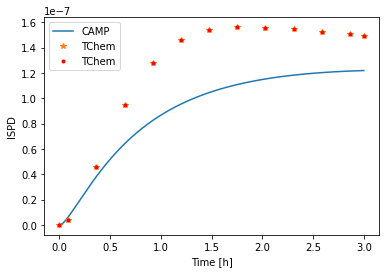

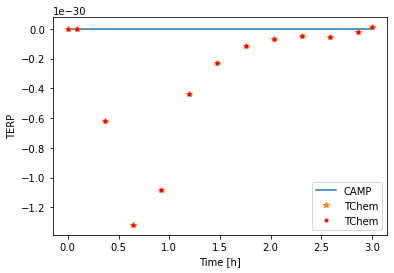

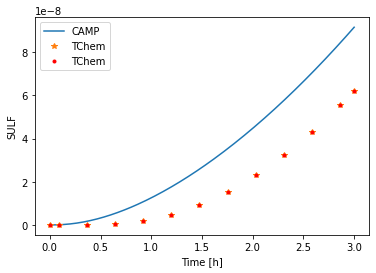

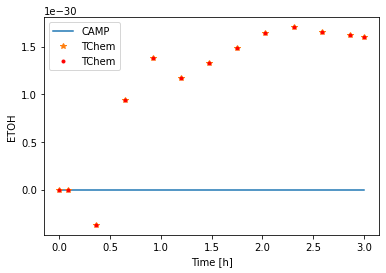

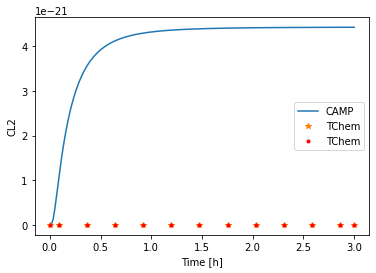

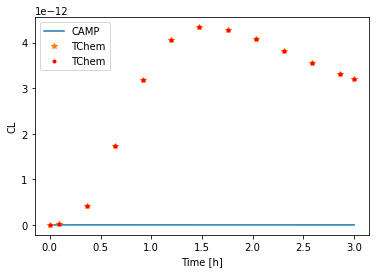

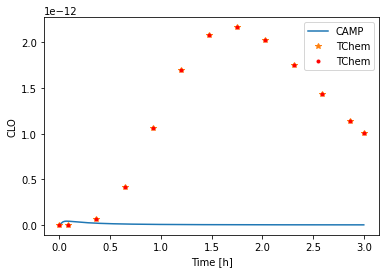

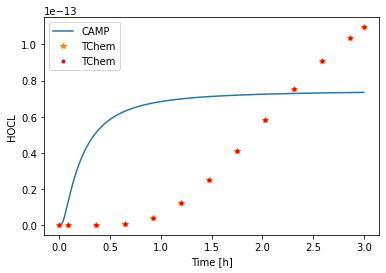

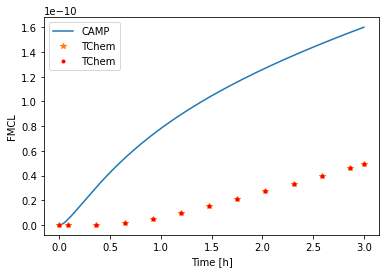

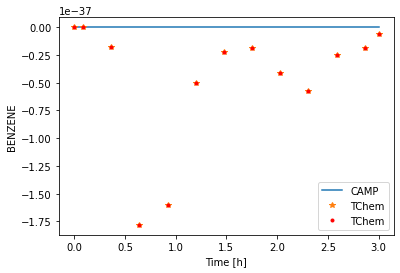

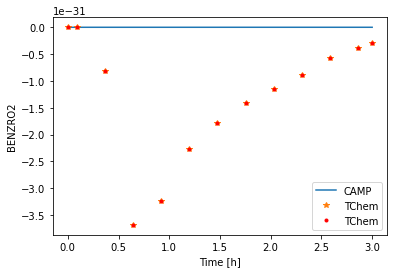

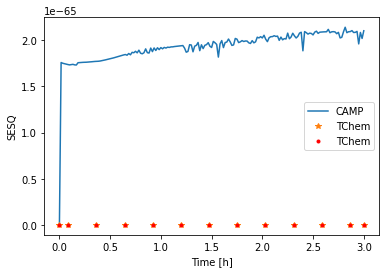

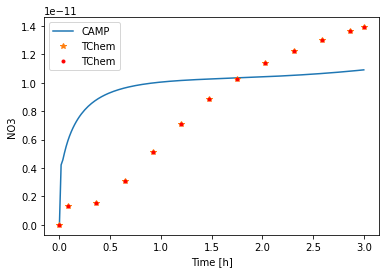

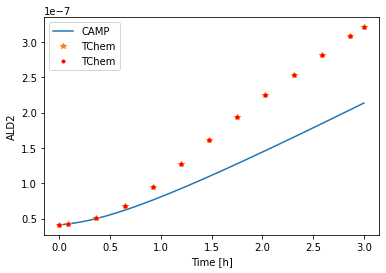

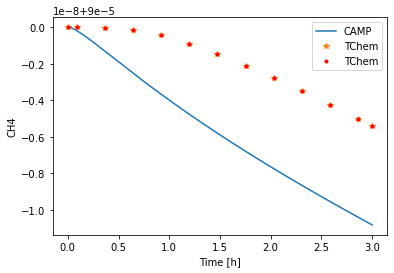

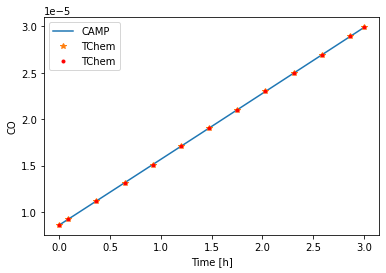

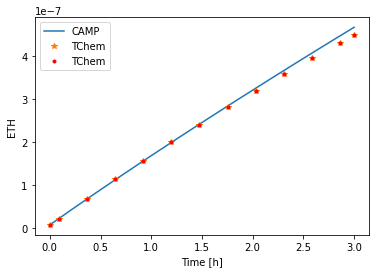

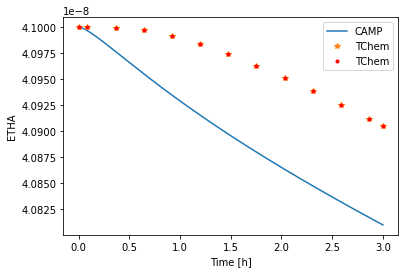

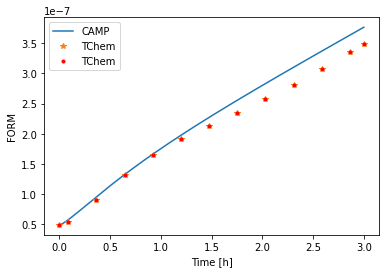

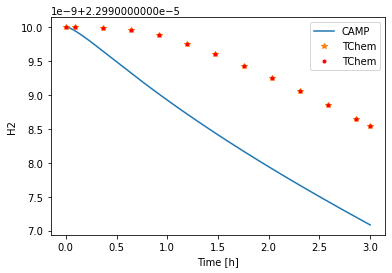

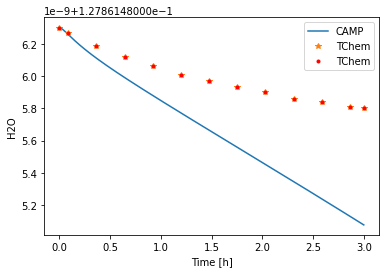

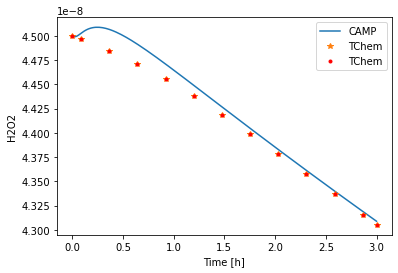

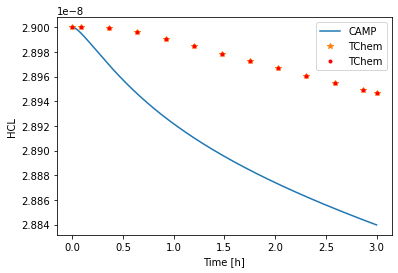

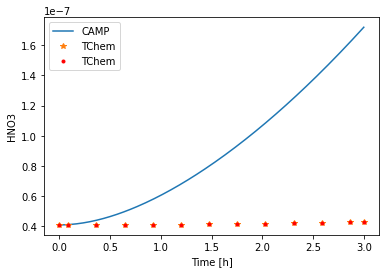

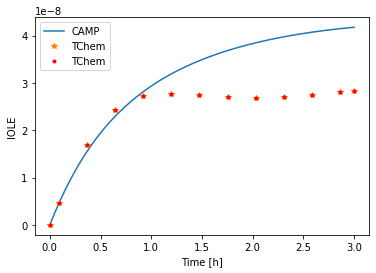

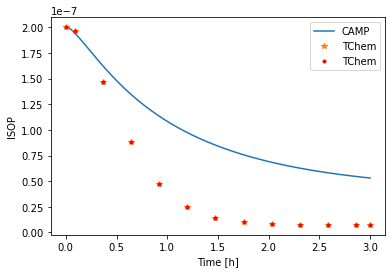

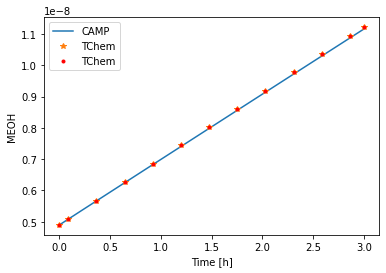

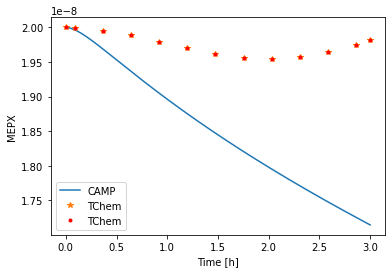

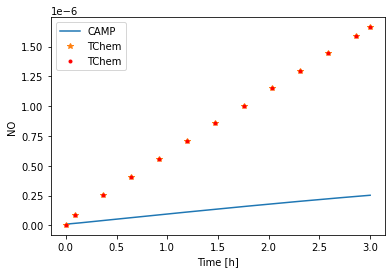

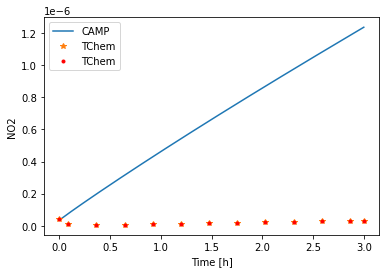

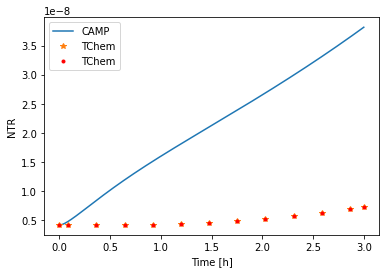

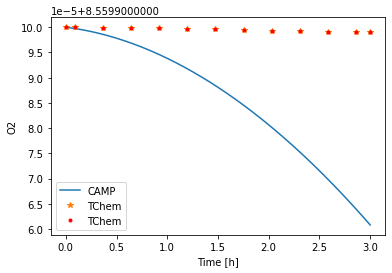

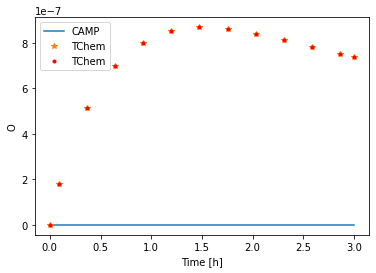

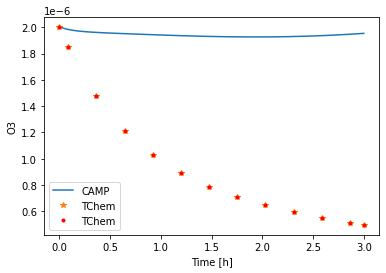

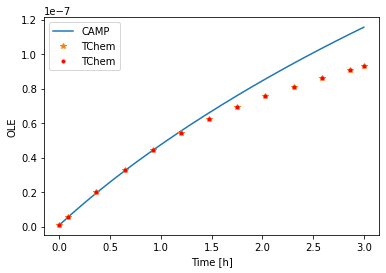

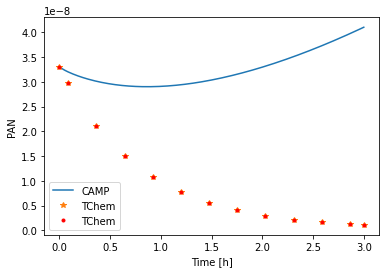

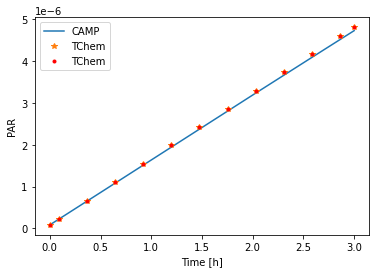

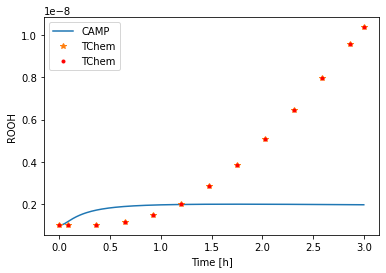

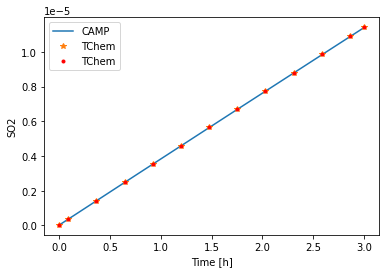

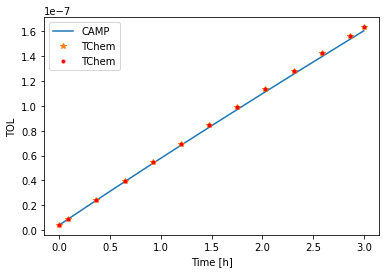

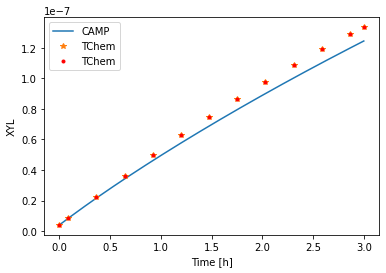

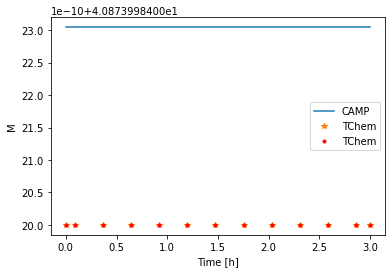

In [9]:
for i,var in enumerate(campNames):
    camp_idx=campHeader.index(campNames[var])
    tchem_idx=Header.index(var)
    plt.figure()
    plt.plot(campsol[:,campHeader.index('time')]/3600, campsol[:,camp_idx],label='CAMP')
    plt.plot(solTchem[:,Header.index('t')]/3600, solTchem[:,tchem_idx], '*',label='TChem')
    plt.xlabel('Time [h]')
    plt.ylabel(var)
    plt.legend(loc='best')
    